# 1. Titanic Exploratory Data Analysis


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


In [3]:
data=pd.read_csv('E:\\Work\\Data Science\\Projects\\Titanic Survival Analysis\\train.csv')

In [4]:
data.sample(7)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
840,841,0,3,"Alhomaki, Mr. Ilmari Rudolf",male,20.0,0,0,SOTON/O2 3101287,7.9250,NaN,S
400,401,1,3,"Niskanen, Mr. Juha",male,39.0,0,0,STON/O 2. 3101289,7.9250,NaN,S
126,127,0,3,"McMahon, Mr. Martin",male,NaN,0,0,370372,7.7500,NaN,Q
524,525,0,3,"Kassem, Mr. Fared",male,NaN,0,0,2700,7.2292,NaN,C
595,596,0,3,"Van Impe, Mr. Jean Baptiste",male,36.0,1,1,345773,24.1500,NaN,S
277,278,0,2,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,239853,0.0000,NaN,S
688,689,0,3,"Fischer, Mr. Eberhard Thelander",male,18.0,0,0,350036,7.7958,NaN,S


In [5]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
#now checking for missing values
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

The Age,Cabin and Embarked have null values. lets try and fix them.

In [7]:
# lets see how many survived
data["Survived"].mean()

0.38383838383838381

The probability of survival is 38.4%

Now lets see if the Survival is dependent on different features such as sex, P-class, age etc

In [8]:
#analysing the features
#Sex-Categorical feature
data.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

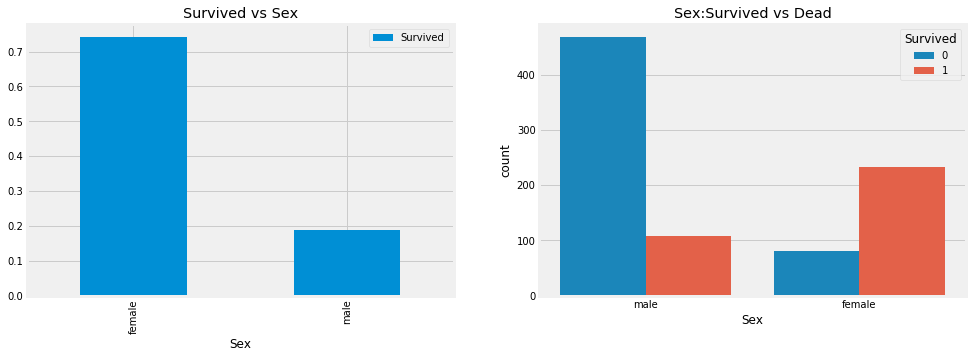

In [9]:
#lets plot it on graph and see what it looks like
f,ax=plt.subplots(1,2,figsize=(15,5))
data[['Sex','Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot('Sex',hue='Survived',data=data,ax=ax[1])
ax[1].set_title('Sex:Survived vs Dead')
plt.show()

what we can understand from these graphs is that Survival rate for females is around 75% while that for males is around 18%


In [10]:
#lets check the cross tabulation too for verification
pd.crosstab(data.Sex,data.Survived, margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


Lets check other Features
P-class - Ordinal Feature

In [11]:
#lets check its crosstab first
pd.crosstab(data.Pclass,data.Survived,margins=True).style.background_gradient()

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


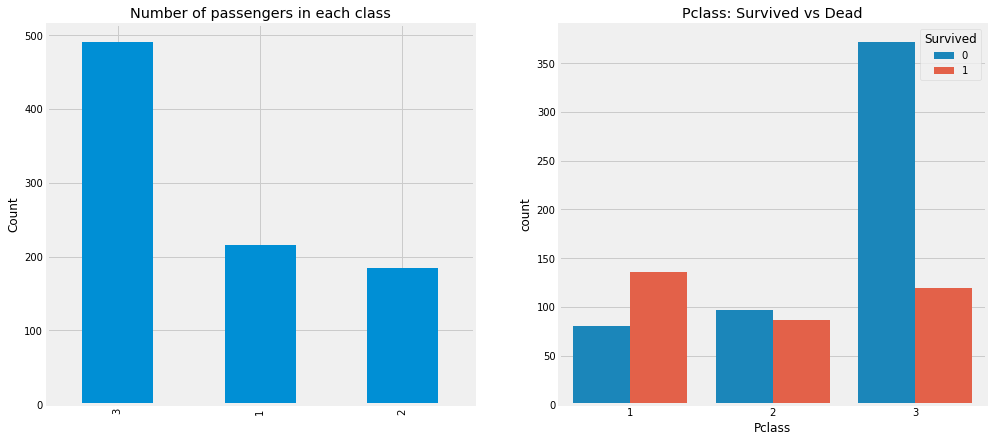

In [12]:
f,ax=plt.subplots(1,2,figsize=(15,7))
data['Pclass'].value_counts().plot.bar(ax=ax[0])
ax[0].set_title('Number of passengers in each class')
ax[0].set_ylabel('Count')
sns.countplot('Pclass',hue='Survived',data=data,ax=ax[1])
ax[1].set_title('Pclass: Survived vs Dead')
plt.show()

We can clearly see that Pclass 1 Passengers were given higher priority while rescue operations

Survival Rates 
Pclass 1 = 63%
Pclass 2 = 48%
Pclass 3 = 25%

Lets dig a little deeper and check for other interesting observations
Lets check the survival rate with Sex and Pclass together 

In [13]:
pd.crosstab([data.Sex,data.Survived],data.Pclass,margins=True).style.background_gradient(cmap='summer_r')

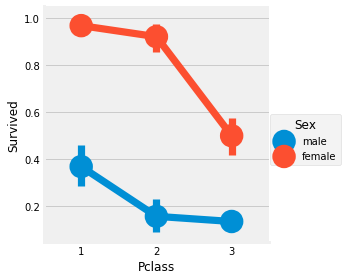

In [14]:
sns.factorplot('Pclass','Survived',hue='Sex',data=data)

We used Factorplot in this case since its make the seperation of categorical values easy. This graph makes thing clear. Women from Pclass 1 have a survival rate of nearly 95% and males around 38%.

This means irrespective of Pclass, women were given priority. 
Pclass is also an important feature. 

Lets see how important role 'Age' played in survival.

Age-Continuous feature

In [15]:
#lets now check for AGE
print(data['Age'].max())
print(data['Age'].min())
print(data['Age'].mean())

80.0
0.42
29.6991176471


Oldest person was 80 years old,
Youngest was 0.42 yr old,
Mean/Average age is 29.7 yrs

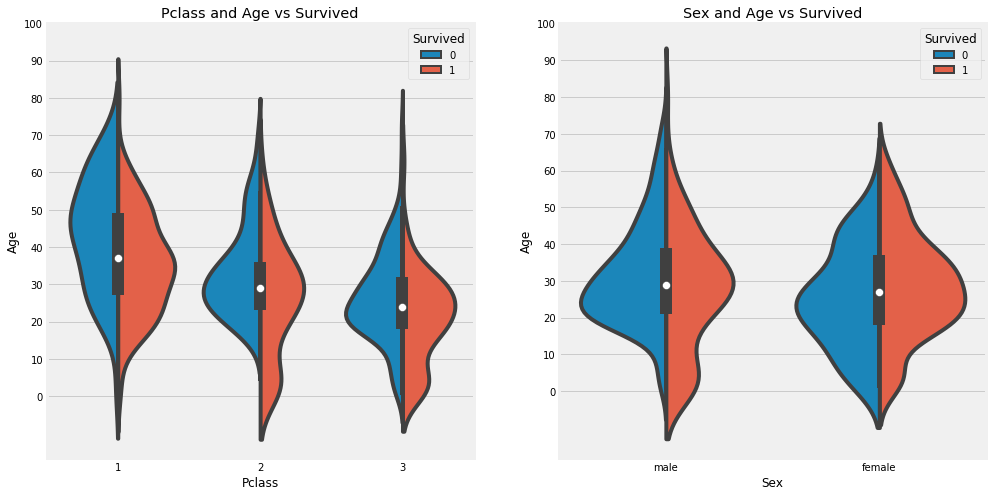

In [16]:
f,ax=plt.subplots(1,2,figsize=(15,8))
sns.violinplot('Pclass','Age',hue='Survived',data=data,split=True,ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))
sns.violinplot('Sex', 'Age', hue='Survived',data=data,split=True,ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()

Observations: 
1. The number of children increases with Pclass. Also the survival of passengers below the age of 10 (Kids) is more irrespective of their Pclass
2. Survival rate for Passengers aged 20-50 from Pclass1 is high and is even better for females.
3. For males the survival chance decreases with decrease in Age


Now we saw that Age feature has 177 null values. These missing values can be replaced with their means. But this would be unfair as the ages were not distributed equally. We might end up assigning a 5year old kid 29years age.

What if we check the 'Name' feature. We can group them by prefix such as Mr or Mrs and then assign mean values of each groups to the missing values.

In [17]:
#we write a function which looks for strings which lie bw A-Z and followed by .(Dot). Lets extract the names
data['Initial']=0
for i in data:
    data['Initial']=data.Name.str.extract('([A-Za-z]+)\.')

We used Regex: [A-Za-z]+). 

In [18]:
#now lets see their crosstab
pd.crosstab(data.Initial,data.Sex).T.style.background_gradient(cmap='summer_r')
#checking initials with sex

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


There are some misspelled initials like Mlle or Mme that stands for Miss. We will replace them with Miss 

In [19]:
data['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)

In [20]:
data.groupby('Initial')['Age'].mean()

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

Now Filling the Missing values using average age based on initials


In [21]:
data.loc[(data.Age.isnull())&(data.Initial=='Mr'),'Age']=33
data.loc[(data.Age.isnull())&(data.Initial=='Mrs'),'Age']=36
data.loc[(data.Age.isnull())&(data.Initial=='Miss'),'Age']=22
data.loc[(data.Age.isnull())&(data.Initial=='Master'),'Age']=5
data.loc[(data.Age.isnull())&(data.Initial=='Other'),'Age']=45


In [22]:
data.Age.isnull().any()

False

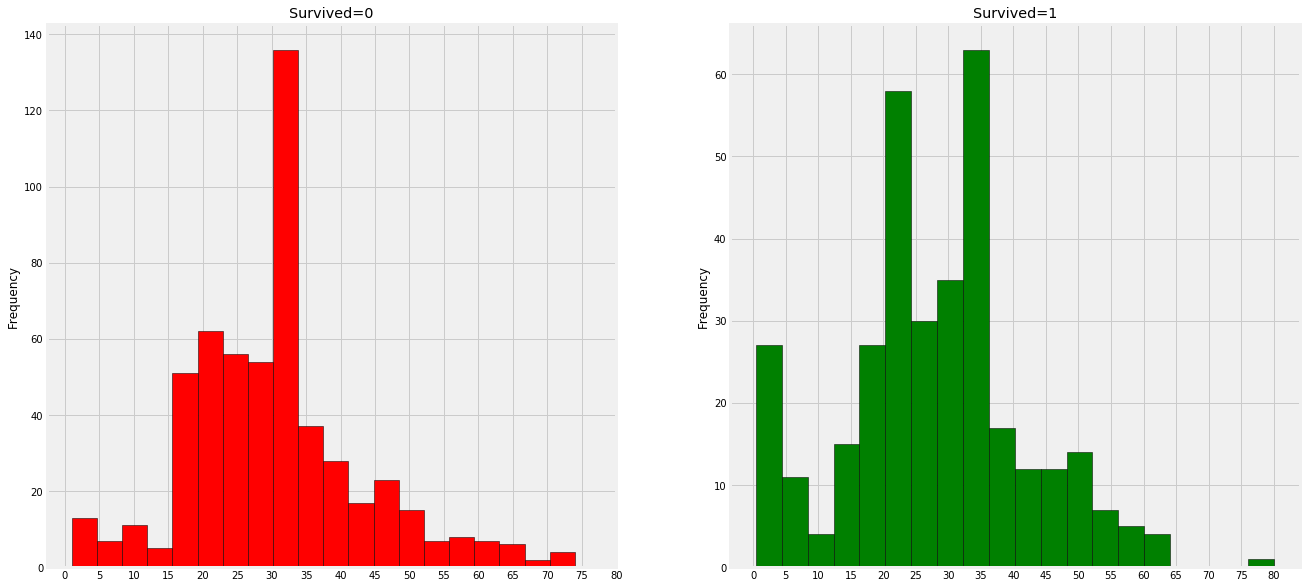

In [23]:
f,ax=plt.subplots(1,2,figsize=(20,10))
data[data['Survived']==0].Age.plot.hist(ax=ax[0],bins=20,edgecolor='black',color='red')
ax[0].set_title('Survived=0')
x1=list(range(0,85,5))
ax[0].set_xticks(x1)
data[data['Survived']==1].Age.plot.hist(ax=ax[1],color='green',bins=20,edgecolor='black')
ax[1].set_title('Survived=1')
x2=list(range(0,85,5))
ax[1].set_xticks(x2)
plt.show()

Observations: 
1. The toddlers(age<5) were saved in large number
2. Maximum number of deaths were in the age group of 30-40

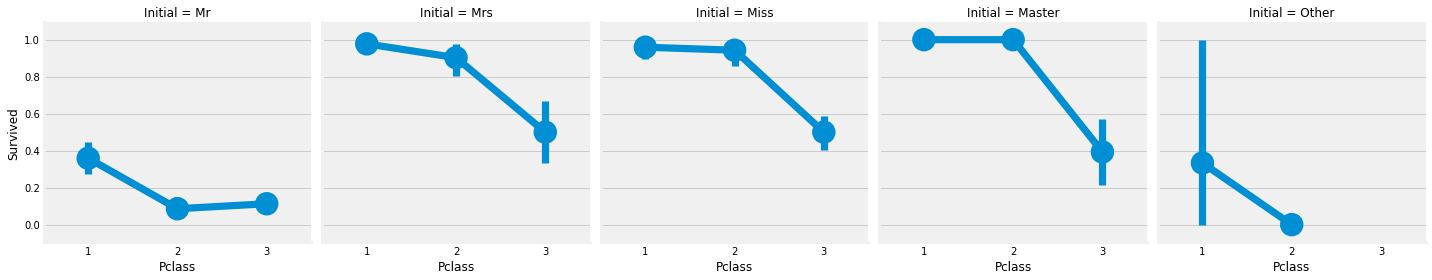

In [24]:
sns.factorplot('Pclass','Survived',col='Initial',data=data)
plt.show()

First Women and Child policy is clearly reflected by this factorplot

In [25]:
#Now moving on to Categorical Features such as "Embarked"
pd.crosstab([data.Embarked,data.Pclass],[data.Sex,data.Survived],margins=True).style.background_gradient(cmap='summer_r')


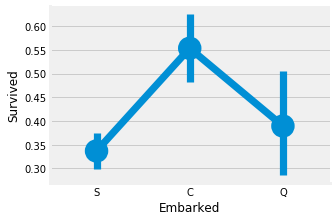

In [26]:
#chances for survival by port of Embarkation
sns.factorplot('Embarked','Survived',data=data)
fig=plt.gcf()
fig.set_size_inches(5,3)
plt.show()


chances of survival for Port C are 0.5 while that for port S are lowest

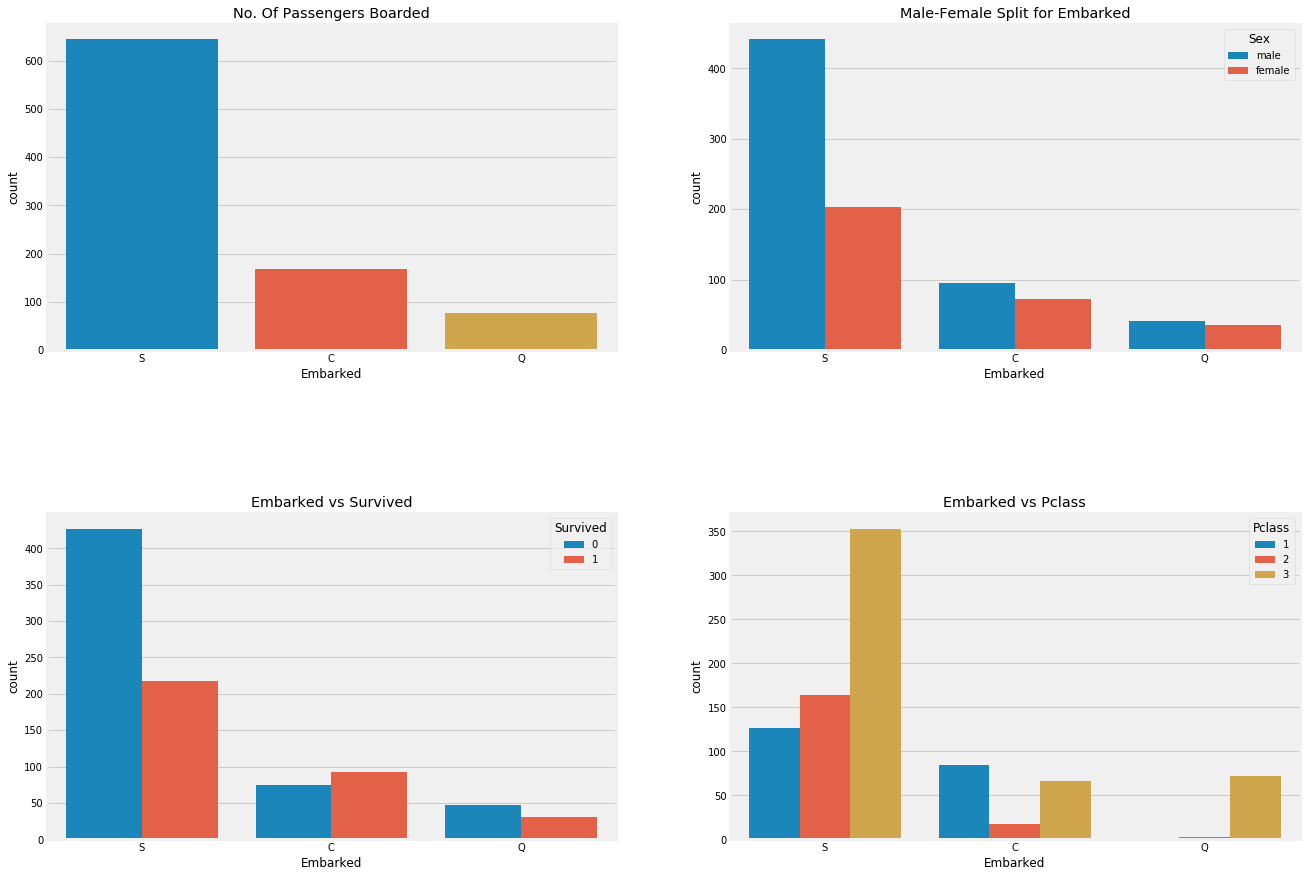

In [27]:
f,ax=plt.subplots(2,2,figsize=(20,15))
sns.countplot('Embarked',data=data,ax=ax[0,0])
ax[0,0].set_title('No. Of Passengers Boarded')
sns.countplot('Embarked',hue='Sex',data=data,ax=ax[0,1])
ax[0,1].set_title('Male-Female Split for Embarked')
sns.countplot('Embarked',hue='Survived',data=data,ax=ax[1,0])
ax[1,0].set_title('Embarked vs Survived')
sns.countplot('Embarked',hue='Pclass',data=data,ax=ax[1,1])
ax[1,1].set_title('Embarked vs Pclass')
plt.subplots_adjust(wspace=0.2,hspace=0.5)
plt.show()

Observations:
1. Max people boarded from S, majority of them were from Pclass 3
2. The passengers who boarded from C have good survival proportion.
3. The port S looks to be the place where majority rich boarded. Still we can see that survival is low here since Maximum PClass 3 people boarded from here and as we already established PClass 3 people were not preffered during rescue
4. 95% of people from Port Q were in PClass 3

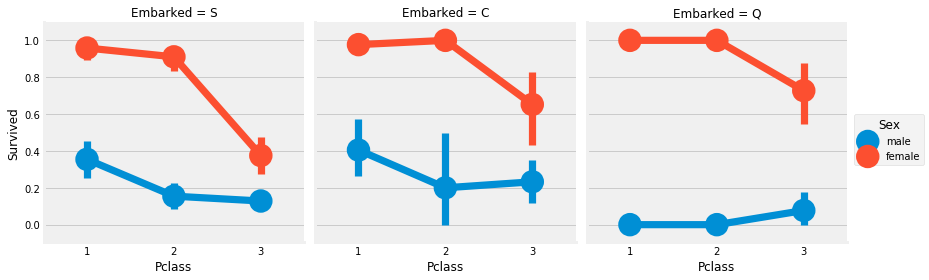

In [28]:
sns.factorplot('Pclass','Survived',hue='Sex',col='Embarked',data=data)
plt.show()

Observations:
1. The Survial chance for females of Pclass 1 and Pclass 2 were nearly 1 irrespective of the Port they embarked from.
2. For port S we see that Pclass 3 Passengers had very low survival rate irrespective of their gender.
3. Port Q had the least survival for males as almost all were from Pclass3


In [29]:
#Treating Missng "Embarked" values. as we saw max passengers were from Port S, we replace NaN with S
data['Embarked'].fillna('S',inplace=True)

In [30]:
data.Embarked.isnull().any()

False

In [31]:
#Now checking another feature called "SibSp" 
#It is a Discrete Feature
#feature represents whether the person is alone or with his family
pd.crosstab([data.SibSp],data.Survived).style.background_gradient(cmap='summer_r')

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


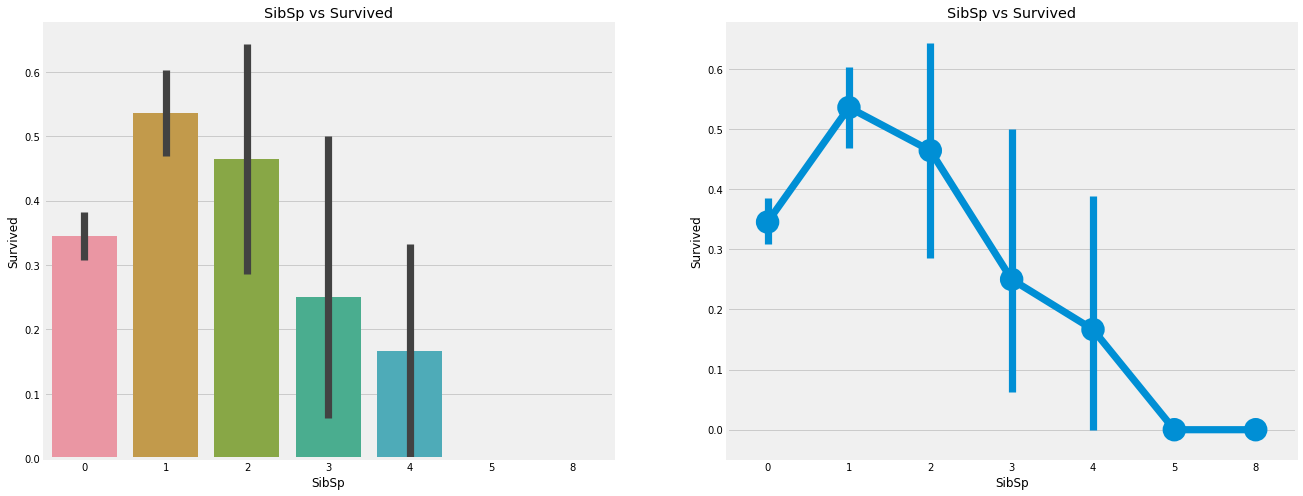

In [32]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.barplot('SibSp','Survived',data=data,ax=ax[0])
ax[0].set_title('SibSp vs Survived')
sns.factorplot('SibSp','Survived',data=data,ax=ax[1])
ax[1].set_title('SibSp vs Survived')
plt.close(2)
plt.show()

In [33]:
pd.crosstab(data.SibSp,data.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
SibSp,,,
0,137,120,351
1,71,55,83
2,5,8,15
3,3,1,12
4,0,0,18
5,0,0,5
8,0,0,7


Observations:
1. From the barplot and factorplot we can see that survival rate of having 1 sibling is highest and then it gradually deacrease as siblings increase.
2. Survival rate of families with SibSp>5 is Zero. What can be the possible reason?
3. We can see from the above crosstab that families with 4 or more people were from Pclass 3 and were not rescued.

In [34]:
#Now checking feature "Parch" which means no. of parents/children
pd.crosstab(data.Parch,data.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
Parch,,,
0,163,134,381
1,31,32,55
2,21,16,43
3,0,2,3
4,1,0,3
5,0,0,5
6,0,0,1


This crosstab confirms that larger families were in Pclass3

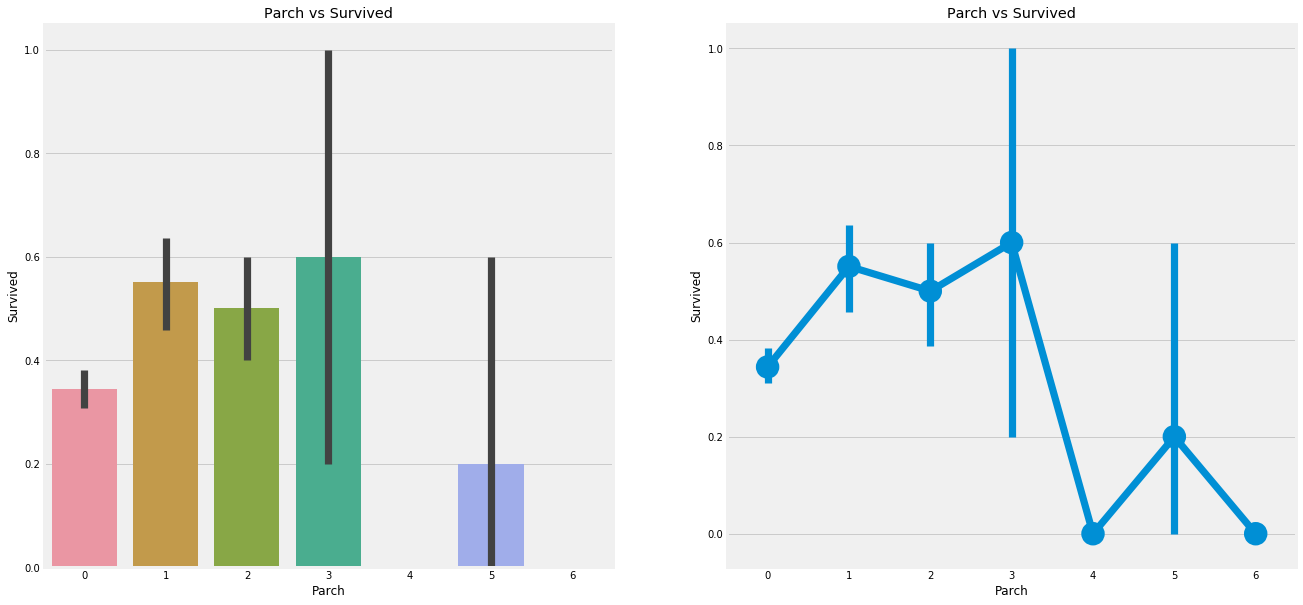

In [35]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.barplot('Parch','Survived',data=data,ax=ax[0])
ax[0].set_title('Parch vs Survived')
sns.factorplot('Parch','Survived',data=data,ax=ax[1])
ax[1].set_title('Parch vs Survived')
plt.close(2)
plt.show()

Observations:
1. Passengers with parents onboard have greater chance of survival but it however reduces when Parch value Increases
2. The chances of survival are good for families that have 1-3 members or Parch. Being alone(not metaphorically :P) and with family members > 4 proves to be fatal.

In [36]:
#Now checking for another feature "Fare"
#this is a continuous feature
print(data['Fare'].max())
print(data['Fare'].min())
print(data['Fare'].mean())

512.3292
0.0
32.2042079686


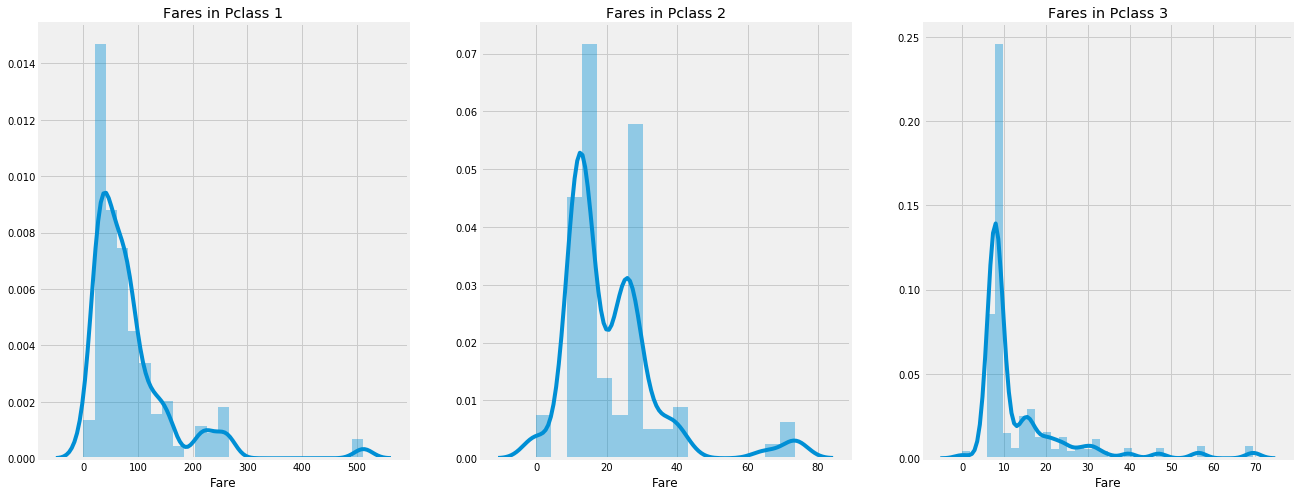

In [37]:
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.distplot(data[data['Pclass']==1].Fare,ax=ax[0])
ax[0].set_title('Fares in Pclass 1')
sns.distplot(data[data['Pclass']==2].Fare,ax=ax[1])
ax[1].set_title('Fares in Pclass 2')
sns.distplot(data[data['Pclass']==3].Fare,ax=ax[2])
ax[2].set_title('Fares in Pclass 3')
plt.show()

The Fares of passnegers have been distributed and this distribution decreases as the Pclass changes

Observations Regarding All Features:

Sex: The chances of survival are high fro women as compared to men.

Pclass: The survival rate for Pclass 1 passengers is high. It is lowest for Pclass 3 passengers. 

Age: Children aged 5-10 years have a high survial rate. People aged 15-35 have low survival rate

Embarked: chances of survival at C looks good. Although most Pclass1 people boarded from S. Passengers from Q were mostly Pclass3

Parch+Sibsp : Having family members bw 1-3 is good for survival, otherwise fatal.


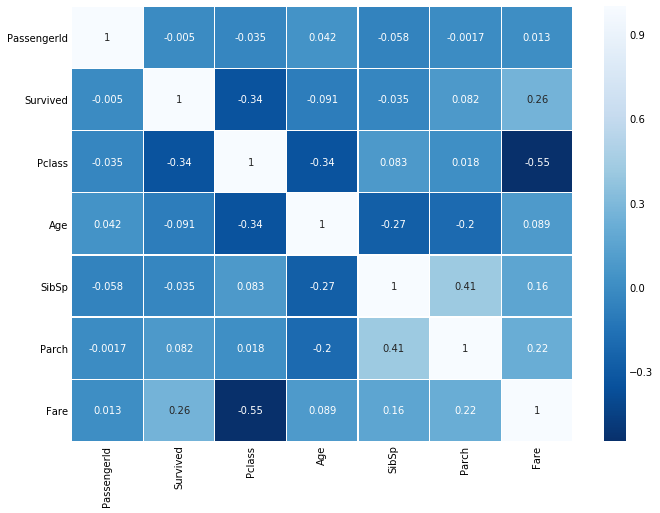

In [38]:
#Now lets check how the features are correlated
sns.heatmap(data.corr(),annot=True,cmap='Blues_r',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

Interpreting The Heatmap:

The Main thing here is that only numeric features are compared as it is obvious that we cannot correlate between alphabets or strings. 

Correlation:

Positive Correlation:
If an increase in Feature A leads to increase in Feature B, then they are positively correlated. Perfect positive correlation = 1

Negative Correlation: 
If an increase in Feature A leads to increase in Feature B, then they are negatively correlated. Perfect negative correlation = -1

Now lets assume that two features are highly or perfectly correlated, so the increase in one leads to increase/decrease in other. This means that they have a linear relation of some sorts eg. X1=X2+c. This is known as MULTICOLLINEARITY. As we know there are very few ways to treat multicollinearity. Dropping the variables is one of them. While making or training models, we should try to eliminate these redundant features as it reduces the training time. 
We can see from the heatmap that features are not much correlated. SibSp and Parch have a correlation of 0.41. In this case we can move fwd with all are features (Since there isn't much correlation)




# 1. Feature Engineering and Data Cleaning
Whenever we are give a dataset with different features, it is not necessary that all those features are important to us. We can either use our current features or make a combination of few of them and reach to another new feature usually called "Synthetic Feature". Lets see if we can get any new features and eliminate a few. Also we will transform the existing relevant features to suitable form for Predictive Modelling.

Now we have Age here as a continuous feature. we can convert it to discrete values by using a process called binning/scaling. In binning we group the range of age into a single bin. This way all the values can be assigned to particular groups.

So we had the maximum age of passengers as 80Years. Now lets convert the age from 0-80 into 5 different bins. So the size of each bin is 16

In [39]:
data['Age_group']=0
data.loc[data['Age']<=16,'Age_group']=0
data.loc[(data['Age']>16)&(data['Age']<=32),'Age_group']=1
data.loc[(data['Age']>32)&(data['Age']<=48),'Age_group']=2
data.loc[(data['Age']>48)&(data['Age']<=64),'Age_group']=3
data.loc[data['Age']>64,'Age_group']=4
data.sample(7)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age_group
731,732,0,3,"Hassan, Mr. Houssein G N",male,11.00,0,0,2699,18.7875,NaN,C,Mr,0
473,474,1,2,"Jerwan, Mrs. Amin S (Marie Marthe Thuillard)",female,23.00,0,0,SC/AH Basle 541,13.7917,D,C,Mrs,1
374,375,0,3,"Palsson, Miss. Stina Viola",female,3.00,3,1,349909,21.0750,NaN,S,Miss,0
173,174,0,3,"Sivola, Mr. Antti Wilhelm",male,21.00,0,0,STON/O 2. 3101280,7.9250,NaN,S,Mr,1
755,756,1,2,"Hamalainen, Master. Viljo",male,0.67,1,1,250649,14.5000,NaN,S,Master,0
352,353,0,3,"Elias, Mr. Tannous",male,15.00,1,1,2695,7.2292,NaN,C,Mr,0
738,739,0,3,"Ivanoff, Mr. Kanio",male,33.00,0,0,349201,7.8958,NaN,S,Mr,2


In [40]:
#lets check the no. of people in each age group
data['Age_group'].value_counts().to_frame().style.background_gradient(cmap='summer')


,Age_group
1,382
2,325
0,104
3,69
4,11


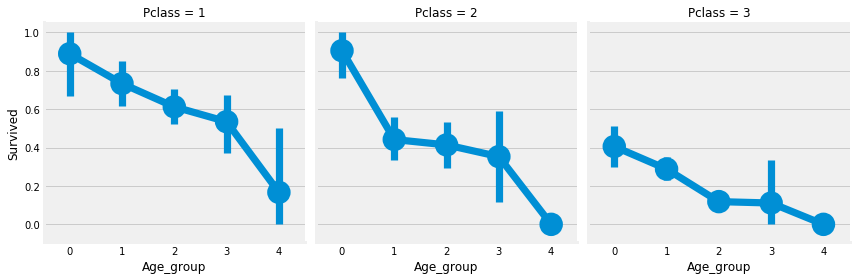

In [41]:
sns.factorplot('Age_group','Survived',data=data,col='Pclass')
plt.show()


Survival rate decreases as the age increases irrespective of the Pclass


Family Size and Alone
We have SibSp and Parch features. can we do a little feature engineering on them. This comibnation of these features can help us check whether the survival rate has anything to do with the family size of the passengers.

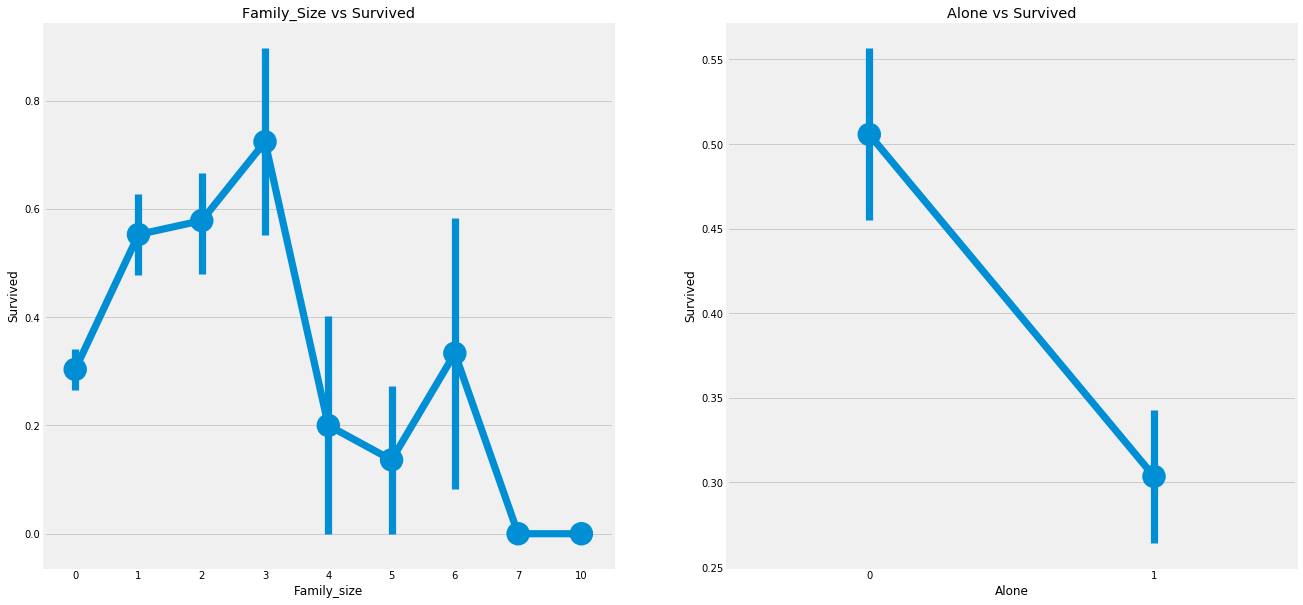

In [42]:
data['Family_size']=0
data['Family_size']=data['Parch']+data['SibSp'] #for family_size
data['Alone']=0
data.loc[data.Family_size==0,'Alone']=1 #for alone

f,ax=plt.subplots(1,2,figsize=(20,10))
sns.factorplot('Family_size','Survived',data=data,ax=ax[0])
ax[0].set_title('Family_Size vs Survived')
sns.factorplot('Alone','Survived',data=data,ax=ax[1])
ax[1].set_title('Alone vs Survived')
plt.close(2)
plt.close(3)
plt.show()



Family_size = 0 means that the passenger is alone. We can see that if you are alone than your chances of survival are very low. For family size>4 the chances decrease too. This looks like an important feature and lets explore it further

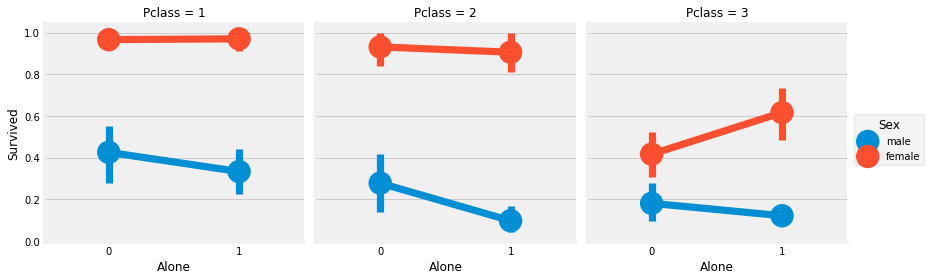

In [43]:
sns.factorplot('Alone','Survived',data=data,hue='Sex',col='Pclass')
plt.show()


It is clear that being alone is not good for survival.

Fare_range

Since fare here is also a continous feature, we have to convert it to ordinal value. We will use pandas.qcut for this. What "qcut" does is if we pass it 5 bins, it will arrange the values equally spaced into 4 seperate bins or value ranges.

In [44]:
data['Fare_range']=pd.qcut(data['Fare'],4)
data.groupby(['Fare_range'])['Survived'].mean().to_frame().style.background_gradient(cmap='summer_r')

,Survived
Fare_range,
"(-0.001, 7.91]",0.197309
"(7.91, 14.454]",0.303571
"(14.454, 31.0]",0.454955
"(31.0, 512.329]",0.581081


As the Fare Range increases, the chances of Survival increases. We cannot use "Fare_range" as it is, so we need to convert it into singleton values just like "Age_group"

In [45]:
data['Fare_cat']=0
data.loc[data['Fare']<=7.91,'Fare_cat']=0
data.loc[(data['Fare']>7.91)&(data['Fare']<=14.454),'Fare_cat']=1
data.loc[(data['Fare']>14.454)&(data['Fare']<=31),'Fare_cat']=2
data.loc[(data['Fare']>31)&(data['Fare']<=513),'Fare_cat']=3



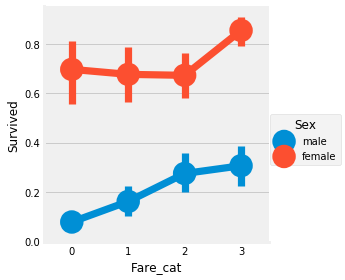

In [46]:
sns.factorplot('Fare_cat','Survived',data=data,hue='Sex')

As we can see as the "Fare_cat" increases the chances of survival increase. This feature might be important to us along with Sex

Now converting String Values into Numeri Values

Since we cannot fwd string values to a machine learning model, we need to convert string features like Sex,Embarked etc into Numeric Values 

In [47]:
data['Sex'].replace(['male','female'],[0,1],inplace=True)
data['Embarked'].replace(['S','C','Q'],[0,1,2],inplace=True)
data['Initial'].replace(['Mr','Mrs','Miss','Master','Other'],[0,1,2,3,4],inplace=True)

Lets Drop Unneccessary Features:

Name: We do not need this feature as it cannot be converted into categorical values

Age: We have engineered "Age_group" so, "Age" is redundant now

Ticket: It is also a random string that cannot be categorised

Fare: again we have "Fare_cat" so we dont need "Fare"

Cabin: it has a lot of missing values also many pass. have multiple cabins so its a useless feature

Fare_range: We have generated "Fare_cat" from it. now lets use that

PassengerID: This again cannot be categorised

In [48]:
#we used drop function to drop the columns of this dataframe, after doing that lets see how our data looks
data.drop(['Name','Age','Ticket','Fare','Cabin','Fare_range','PassengerId'],axis=1,inplace=True)
data.sample(7)

,Survived,Pclass,Sex,SibSp,Parch,Embarked,Initial,Age_group,Family_size,Alone,Fare_cat
103,0,3,0,0,0,0,0,2,0,1,1
495,0,3,0,0,0,1,0,2,0,1,2
816,0,3,1,0,0,0,2,1,0,1,1
83,0,1,0,0,0,0,0,1,0,1,3
322,1,2,1,0,0,2,2,1,0,1,1
372,0,3,0,0,0,0,0,1,0,1,1
399,1,2,1,0,0,0,1,1,0,1,1


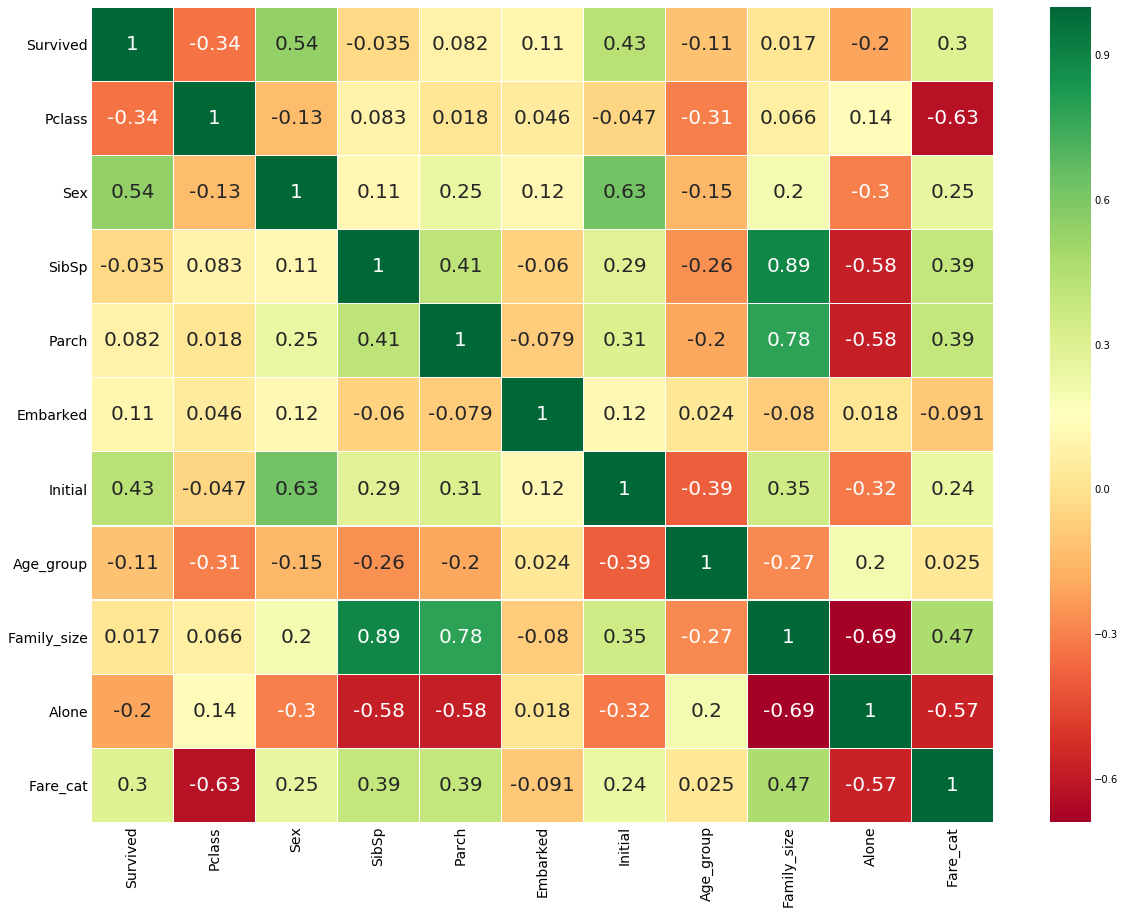

In [49]:
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2,annot_kws={'size':20})
fig=plt.gcf()
fig.set_size_inches(18,15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

from the above correlation plot we can say there are few positive and negative correlations present. "SibSp" and "Family_size", "Parch" and "Family_size" are positive while "Alone" and "Family_size" is negative

# 3. Predictive Modelling

we have some pre requisite knowledge from the EDA part. But we cannot still Predict accurately whether a person is going to survive or die. We will use some Classification Algorithm to train our model. These are the models that we will be using:

1. Logistic Regression
2. Support Vector Machines (Linear and Radial)
3. Random Forest
4. K Nearest Neighbours
5. Naive Bayes
6. Decision Tree
7. Logistic Regression

In [50]:
#now lets import all the required packages
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [51]:
train,test=train_test_split(data,test_size=0.3,random_state=0,stratify=data['Survived'])
train_X=train[train.columns[1:]]
train_Y=train[train.columns[:1]]
test_X=test[test.columns[1:]]
test_Y=test[test.columns[:1]]
X=data[data.columns[1:]]
Y=data['Survived']

In [52]:
#RADIAL SUPPORT VECTOR MACHINES (rbf-SVM)
model1=svm.SVC(kernel='rbf',C=1,gamma=0.1)
model1.fit(train_X,train_Y)
prediction1=model1.predict(test_X)
print('Accuracy for rbf SVM is ',metrics.accuracy_score(prediction1,test_Y))

Accuracy for rbf SVM is  0.835820895522


In [53]:
#LINEAR SUPPORT VECTOR MACHINE (linear-SVM)
model2=svm.SVC(kernel='linear',C=0.1,gamma=0.1)
model2.fit(train_X,train_Y)
prediction2=model2.predict(test_X)
print('Accuracy=',metrics.accuracy_score(prediction2,test_Y))

Accuracy= 0.817164179104


In [54]:
#LOGISTIC REGRESSION
model3=LogisticRegression()
model3.fit(train_X,train_Y)
prediction3=model3.predict(test_X)
print('Accuracy=',metrics.accuracy_score(prediction3,test_Y))

Accuracy= 0.817164179104


In [55]:
#DECISION TREE
model4=DecisionTreeClassifier()
model4.fit(train_X,train_Y)
prediction4=model4.predict(test_X)
print('Accuracy=',metrics.accuracy_score(prediction4,test_Y))

Accuracy= 0.80223880597


In [56]:
#K-NEAREST-NEIGHBORS (KNN)
model5=KNeighborsClassifier()
model5.fit(train_X,train_Y)
prediction5=model5.predict(test_X)
print('Accuracy=',metrics.accuracy_score(prediction5,test_Y))

Accuracy= 0.832089552239


Now in KNN , K stands for the no. of closest values to be taken. if we change the value of K we might get different accuracies for diff values. The default value is 5. Lets see how accuracy varies over diff values

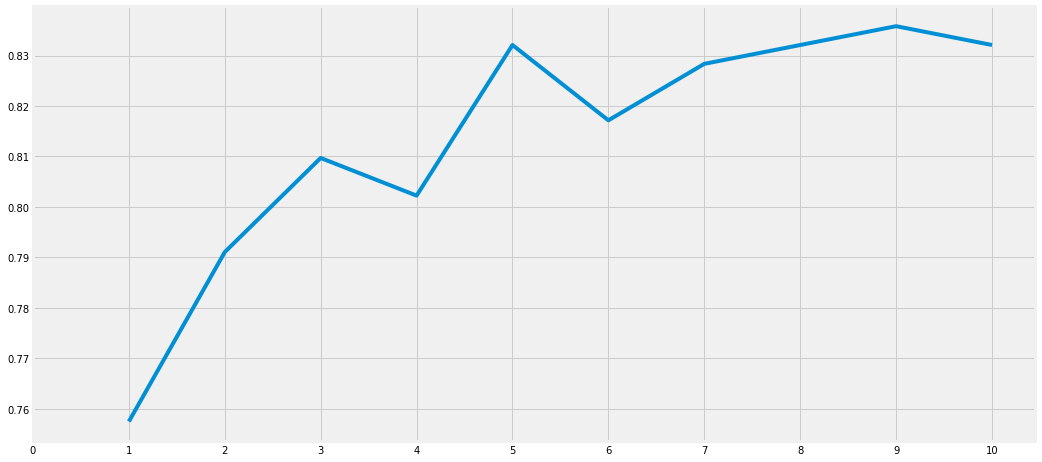

Accuracies for different values of K are: [ 0.75746269  0.79104478  0.80970149  0.80223881  0.83208955  0.81716418
  0.82835821  0.83208955  0.8358209   0.83208955] with the max value as  0.835820895522


In [57]:
a_index=list(range(1,11))
a=pd.Series()
x=[0,1,2,3,4,5,6,7,8,9,10]
for i in list(range(1,11)):
    model=KNeighborsClassifier(n_neighbors=i) 
    model.fit(train_X,train_Y)
    prediction=model.predict(test_X)
    a=a.append(pd.Series(metrics.accuracy_score(prediction,test_Y)))
plt.plot(a_index, a)
plt.xticks(x)
fig=plt.gcf()
fig.set_size_inches(16,8)
plt.show()
print('Accuracies for different values of K are:',a.values,'with the max value as ',a.values.max())

In [58]:
#GAUSSIAN NAIVE BAYES
model6=GaussianNB()
model6.fit(train_X,train_Y)
prediction6=model6.predict(test_X)
print('Accuracy=',metrics.accuracy_score(prediction6,test_Y))

Accuracy= 0.813432835821


In [59]:
#RANDOM FOREST
model7=RandomForestClassifier(n_estimators=100)
model7.fit(train_X,train_Y)
prediction7=model7.predict(test_X)
print('Accuracy=',metrics.accuracy_score(prediction7,test_Y))


Accuracy= 0.817164179104


the accuracy of a model is not the only factor that determines how good it is. lets consider that we have a 90% accuracy, i.e our model is able to classify the test set with 90% accuracy. now this values of accuracy might vary for different values of test set.This is because we cannot determine which all instances will the classifier use to train itself. As the training and testing data changes the accuracy might also increase or decrease. This is known as MODEL VARIANCE.

to overcome this and get a generalised model, we use CROSS VALIDATION

CROSS VALIDATION:

a lot of time the data is imbalanced, i.e we may have high no. of class1 instances and less no. of other classes. So we should train and test our algo on each and every instance of dataset. After that we can take an average of these accuracies.

1. The K-Fold Cross Validation works by first dividing the dataset into k-subsets.
2. Lets say we divide the dataset into K=5 parts. We reserve 1 part for testing and train the algo over other 4 parts.
3. We continue this and keep changing the testing part in each iteration and train the algo over other parts. The accuracies and errors are then averaged to get a average accuracy of the algorithm

This is called K-Fold Cross Validation

4. an algo might underfit over a dataset for some training data and sometimes also overfit the data for other training sets. Thus with cross validation we can achieve a generalised model.

In [60]:
from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.model_selection import cross_val_predict #prediction
kfold = KFold(n_splits=10, random_state=22) # k=10, split the data into 10 equal parts
xyz=[]
accuracy=[]
std=[]
classifiers=['Linear Svm','Radial Svm','Logistic Regression','KNN','Decision Tree','Naive Bayes','Random Forest']
models=[svm.SVC(kernel='linear'),svm.SVC(kernel='rbf'),LogisticRegression(),KNeighborsClassifier(n_neighbors=9),DecisionTreeClassifier(),GaussianNB(),RandomForestClassifier(n_estimators=100)]
for i in models:
    model = i
    cv_result = cross_val_score(model,X,Y, cv = kfold,scoring = "accuracy")
    cv_result=cv_result
    xyz.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)
new_models_dataframe2=pd.DataFrame({'CV Mean':xyz,'Std':std},index=classifiers)       
new_models_dataframe2

,CV Mean,Std
Linear Svm,0.793471,0.047797
Radial Svm,0.828290,0.034427
Logistic Regression,0.805843,0.021861
KNN,0.813783,0.041210
Decision Tree,0.808115,0.027443
Naive Bayes,0.801386,0.028999
Random Forest,0.817091,0.034632


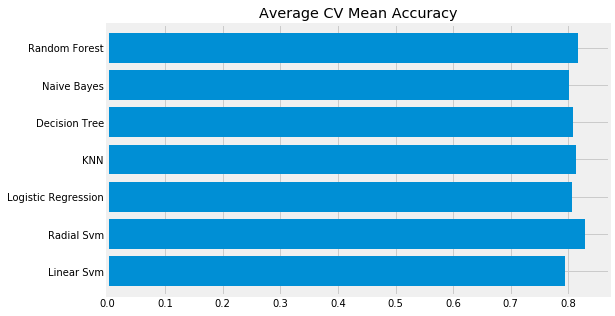

In [61]:
new_models_dataframe2['CV Mean'].plot.barh(width=0.8)
plt.title('Average CV Mean Accuracy')
fig=plt.gcf()
fig.set_size_inches(8,5)
plt.show()

The classification accuracy can be misleading sometimes due to imbalance. We can get a summarized result with the help of confusion matrix, which shows where did the model went wrong or which class got predicted wrong

CONFUSION MATRIX: 
It gives the no. of correct and incorrect classifications made by the classifier

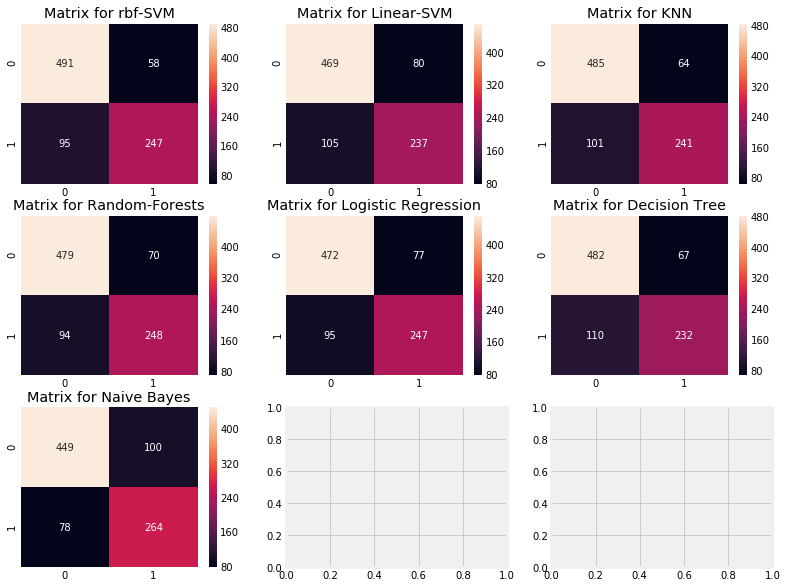

In [62]:
f,ax=plt.subplots(3,3,figsize=(12,10))
y_pred = cross_val_predict(svm.SVC(kernel='rbf'),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,0],annot=True,fmt='2.0f')
ax[0,0].set_title('Matrix for rbf-SVM')
y_pred = cross_val_predict(svm.SVC(kernel='linear'),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,1],annot=True,fmt='2.0f')
ax[0,1].set_title('Matrix for Linear-SVM')
y_pred = cross_val_predict(KNeighborsClassifier(n_neighbors=9),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,2],annot=True,fmt='2.0f')
ax[0,2].set_title('Matrix for KNN')
y_pred = cross_val_predict(RandomForestClassifier(n_estimators=100),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,0],annot=True,fmt='2.0f')
ax[1,0].set_title('Matrix for Random-Forests')
y_pred = cross_val_predict(LogisticRegression(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,1],annot=True,fmt='2.0f')
ax[1,1].set_title('Matrix for Logistic Regression')
y_pred = cross_val_predict(DecisionTreeClassifier(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,2],annot=True,fmt='2.0f')
ax[1,2].set_title('Matrix for Decision Tree')
y_pred = cross_val_predict(GaussianNB(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[2,0],annot=True,fmt='2.0f')
ax[2,0].set_title('Matrix for Naive Bayes')
plt.subplots_adjust(hspace=0.2,wspace=0.2)
plt.show()

Interpreting The Confusuion Matrix:

The left inclined diagonal in each square shows the no. of correct predictions while the right inclined diagonal shows the no. of wrong predictions made. 

eg. Considering first rbf-SVM plot
1. The no. of correct predictions are 491+247 with a mean cv accuracy being (491+247)/891= 82.8% (which we saw before)
2. Errors: It wrongly classified 58 dead people as survived and 95 survivors as dead.

we can say that rbf-SVM has a higher chance in correctly predictiong the dead passengers but Naive Bayed has higher chance in correctly predicting passengers who survived.

Hyper-Parameter Tuning:

The machine learning models have a default set of parameters on which it works. These default values can be tweaked in order to get a better model. Like the "C" and "gamma" in the SVM model. Similary different parameters for different classifiers are called hyper-parameters, which we can tune/change/tweak to change the learning rate of the algorithm and get ourselves a better model. This is known as HYPER PARAMETER TUNING

Lets Hyper-Tune the 2 best classifiers namely : SVM and RandomForest

In [63]:
#SVM Hyper Tuning
from sklearn.model_selection import GridSearchCV
C=[0.05,0.1,0.2,0.25,0.4,0.3,0.5,0.6,0.7,0.8,0.9,1]
gamma=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
kernel=['rbf','linear']
hyper={'kernel':kernel,'C':C,'gamma':gamma}
gd=GridSearchCV(estimator=svm.SVC(),param_grid=hyper,verbose=True)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)


Fitting 3 folds for each of 240 candidates, totalling 720 fits
0.828282828283
SVC(C=0.5, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


[Parallel(n_jobs=1)]: Done 720 out of 720 | elapsed:  1.0min finished


In [64]:
#RandomForest Hyper-Tuning
n_estimators=range(100,1000,100)
hyper={'n_estimators':n_estimators}
gd=GridSearchCV(estimator=RandomForestClassifier(random_state=0),param_grid=hyper,verbose=True)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)


Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:  1.5min finished


0.817059483726
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=900, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)


Observations:

1. rbf-SVM has highest accuracy of 82.82% when C=0.5 anf gamma=0.1
2. RandomForest has highest accuracy of 81.8% when n_estimators=900

ENSEMBLING:

The combination of various simple models to create a single powerful model is called ensembling. It is a good way to increase the accuracy of our model.

Ensembling can be done in these ways:
1. Voting Classifier
2. Bagging
3. Boosting

Voting Classifier: It is the simplest way of combining predictions from many different simple machine learning models. It gives an average prediction result based on the prediction of all sub models. The submodels or the base models are of different types.


In [65]:
from sklearn.ensemble import VotingClassifier
ensemble_lin_rbf=VotingClassifier(estimators=[('KNN',KNeighborsClassifier(n_neighbors=10)),
                                              ('RBF',svm.SVC(probability=True,kernel='rbf',C=0.5,gamma=0.1)),
                                              ('RFor',RandomForestClassifier(n_estimators=500,random_state=0)),
                                              ('LR',LogisticRegression(C=0.05)),
                                              ('DT',DecisionTreeClassifier(random_state=0)),
                                              ('NB',GaussianNB()),
                                              ('svm',svm.SVC(kernel='linear',probability=True))
                                             ], 
                       voting='soft').fit(train_X,train_Y)
print('The accuracy for ensembled model is:',ensemble_lin_rbf.score(test_X,test_Y))
cross=cross_val_score(ensemble_lin_rbf,X,Y, cv = 10,scoring = "accuracy")
print('The cross validated score is',cross.mean())

The accuracy for ensembled model is: 0.824626865672
The cross validated score is 0.823766031097


Bagging: 

Bagging is a general ensemble method. It applies similar classifiers on small portions of the dataset and then taking the average of all the predictions. Due to the averaging there is a reduction in variance. Unlike VotingClassifier, Bagging makes use of similar classifiers.

Bagged KNN:   Bagging works best with models with high variance. An example for this can be Decision Tree or Random Forest. We can use KNN with small value of N_neighbors.

In [66]:
from sklearn.ensemble import BaggingClassifier
model=BaggingClassifier(base_estimator=KNeighborsClassifier(n_neighbors=3),random_state=0,n_estimators=700)
model.fit(train_X,train_Y)
prediction=model.predict(test_X)
print('The accuracy for bagged KNN is:',metrics.accuracy_score(prediction,test_Y))
result=cross_val_score(model,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for bagged KNN is:',result.mean())

The accuracy for bagged KNN is: 0.835820895522
The cross validated score for bagged KNN is: 0.814889342867


In [67]:
#BAGGED DECISION TREE
model=BaggingClassifier(base_estimator=DecisionTreeClassifier(),random_state=0,n_estimators=100)
model.fit(train_X,train_Y)
prediction=model.predict(test_X)
print('The accuracy for bagged Decision Tree is:',metrics.accuracy_score(prediction,test_Y))
result=cross_val_score(model,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for bagged Decision Tree is:',result.mean())

The accuracy for bagged Decision Tree is: 0.824626865672
The cross validated score for bagged Decision Tree is: 0.820482635342


BOOSTING :: 

Boosting is an ensembling technique which uses sequential learning of classifiers. It is a step by step enhancement of a weak model. 

This is How BOOSTING works:

A model is first trained on the complete dataset. Now the model will get few instances right while some wrong. In the next iteration, the learner will focus more on the wrongly predicted instances or give more weight to them. Thus it will try to predict the wrong instances correctly. Now this iterative process continous and new classifiers are added to the model until the accuracy limit is rached.

::::::::::::::AdaBoost(Adaptive Boosting)::::::::::::::::

In this classifier is a meta-estimator that begins by fitting classifier on the original dataset and then fits additional copies of the classifier on the same dataset but where the weights the weights are adjusted to focus more on the wrongly predicted instances.

In [68]:
#The weak learner or estimator in this case is a Decision Tree. But we
#Can change the default base_estimator to any algorithm of our choice.
from sklearn.ensemble import AdaBoostClassifier
ada=AdaBoostClassifier(n_estimators=200,random_state=0,learning_rate=0.1)
result=cross_val_score(ada,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for AdaBoost is:',result.mean())

The cross validated score for AdaBoost is: 0.824952616048


Stochastic Gradient Boosting:


Here too the weak learner is a Decision Tree.

In [69]:
from sklearn.ensemble import GradientBoostingClassifier
grad=GradientBoostingClassifier(n_estimators=500,random_state=0,learning_rate=0.1)
result=cross_val_score(grad,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for Gradient Boosting is:',result.mean())


The cross validated score for Gradient Boosting is: 0.818286233118


XGBoost

In [70]:
import xgboost as xg
xgboost=xg.XGBClassifier(n_estimators=900,learning_rate=0.1)
result=cross_val_score(xgboost,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for XGBoost is:',result.mean())

The cross validated score for XGBoost is: 0.810471002156


We got the highest accuracy for AdaBoost. We will try to increase its efficiency using Hyper-Parameter Tuning

In [71]:
#HYPER-PARAMETER TUNING FOR ADABOOST
n_estimators=list(range(100,1100,100))
learn_rate=[0.05,0.1,0.2,0.3,0.25,0.4,0.5,0.6,0.7,0.8,0.9,1]
hyper={'n_estimators':n_estimators,'learning_rate':learn_rate}
gd=GridSearchCV(estimator=AdaBoostClassifier(),param_grid=hyper,verbose=True)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 3 folds for each of 120 candidates, totalling 360 fits


[Parallel(n_jobs=1)]: Done 360 out of 360 | elapsed: 22.1min finished


0.83164983165
AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=0.05, n_estimators=200, random_state=None)


The Max. Accuracy that we get is with AdaBoost and is 83.16% with n_estimators=200 and learning_rate=0.05

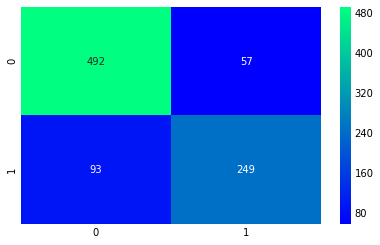

In [72]:
#Confusion Matrix for the Best Model
ada=AdaBoostClassifier(n_estimators=200,random_state=0,learning_rate=0.05)
result=cross_val_predict(ada,X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,result),cmap='winter',annot=True,fmt='2.0f')
plt.show()

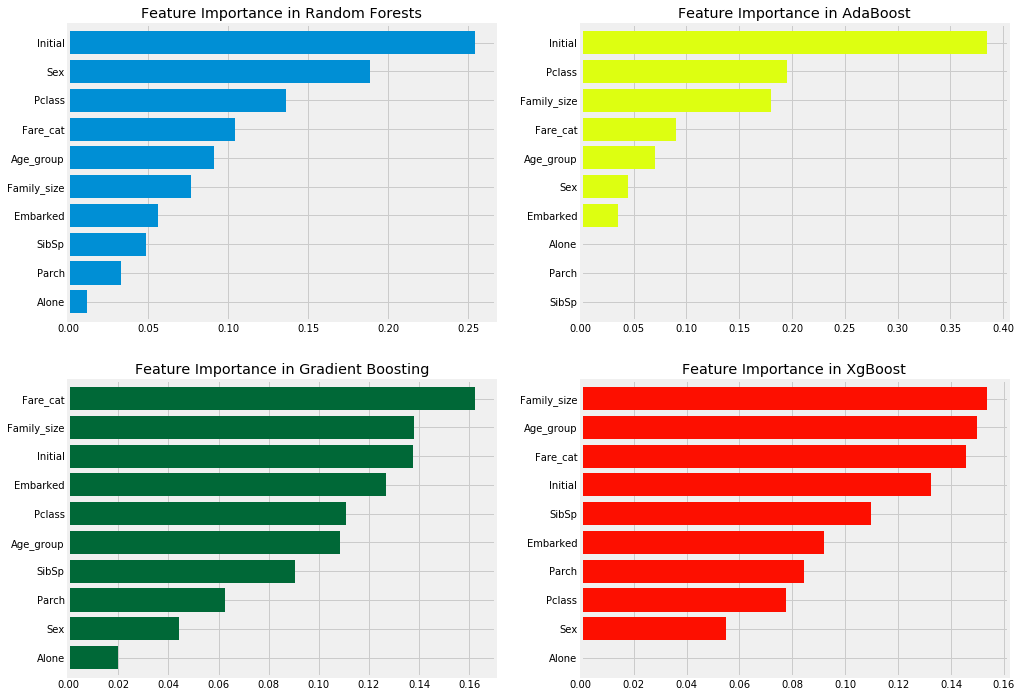

In [73]:
#Feature Importance

f,ax=plt.subplots(2,2,figsize=(15,12))
model=RandomForestClassifier(n_estimators=500,random_state=0)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[0,0])
ax[0,0].set_title('Feature Importance in Random Forests')
model=AdaBoostClassifier(n_estimators=200,learning_rate=0.05,random_state=0)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[0,1],color='#ddff11')
ax[0,1].set_title('Feature Importance in AdaBoost')
model=GradientBoostingClassifier(n_estimators=500,learning_rate=0.1,random_state=0)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[1,0],cmap='RdYlGn_r')
ax[1,0].set_title('Feature Importance in Gradient Boosting')
model=xg.XGBClassifier(n_estimators=900,learning_rate=0.1)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[1,1],color='#FD0F00')
ax[1,1].set_title('Feature Importance in XgBoost')
plt.show()

OBSERVATIONS:

1. Important Features are : Initial,Fare_cat,Pclass,Family_size
2. The Sex feature isnt much important except in random forest. Although we saw earlier that Sex combined with Pclass is a very good feature
 we see that the feature "Initia" is very important and the reason is in a way Intital points to Gender and hence Sex
3. Similarly the Pclass and Fare_cat refer to the status of the passengers and Family_size with Alone, Parch and SibSp.


# THIS.IS.IT  THANKS!!